In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from scipy.stats import randint, uniform
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
import shap
import warnings
import gpboost as gpb
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("finalfile.txt", sep="\t")

In [3]:
df.dtypes

strain             object
A1C                 int64
A1G                 int64
A1T                 int64
T2G                 int64
                    ...  
Nextclade_pango    object
region             object
country            object
category           object
Collection date    object
Length: 16424, dtype: object

In [4]:
finalfile=df

In [5]:
finalfile["Collection date"] = pd.to_datetime(
    finalfile["Collection date"], 
    format="mixed", 
    dayfirst=True)

In [6]:
print(finalfile["Collection date"].dtypes)
print(finalfile["Collection date"].head())

datetime64[ns]
0   2024-01-12
1   2024-01-03
2   2024-01-06
3   2024-01-30
4   2024-01-01
Name: Collection date, dtype: datetime64[ns]


In [7]:
final_df=finalfile

In [8]:
final_df

strain  A1C  A1G  A1T  T2G  T2K  \
0       hCoV-19/Turkey/TSIM_Ankara_140111_978/2024    0    0    0    0    0   
1      hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024    0    0    0    1    0   
2                hCoV-19/Brazil/RJ-FIOCRUZ-51/2024    0    0    0    1    0   
3               hCoV-19/Fujian/FCDC-FZ9970725/2024    0    0    0    1    0   
4              hCoV-19/Fujian/FCDC-XM010309HG/2024    0    0    0    1    0   
...                                            ...  ...  ...  ...  ...  ...   
13968     hCoV-19/Spain/CT-LabRefCat-9317885r/2024    0    0    0    1    0   
13969     hCoV-19/Spain/CT-LabRefCat-6385185r/2024    0    0    0    1    0   
13970                 hCoV-19/USA/NY-WMC-6178/2024    0    0    0    1    0   
13971        hCoV-19/Mexico/GUA_CIAD_01001002/2024    0    0    0    1    0   
13972          hCoV-19/Brazil/SC-FIOCRUZ-1104/2024    0    0    0    1    0   

       T2A  T2C  T3C  T3A  ...  A29891G  A29892G  Gender  Patient age  \
0        0    0    0    0  ...        0        0    Male        87.00   
1        0    0    1    0  ...        1        1  Female        91.00   
2        0    0    1    0  ...        1        1    Male        35.00   
3        0    0    1    0  ...        1        1    Male        70.00   
4        0    0    1    0  ...        1        1  Female        19.00   
...    ...  ...  ...  ...  ...      ...      ...     ...          ...   
13968    0    0    1    0  ...        1        1    Male        94.00   
13969    0    0    1    0  ...        1        1  Female        81.00   
13970    0    0    1    0  ...        1        1    Male         0.42   
13971    0    0    1    0  ...        1        1  Female        26.00   
13972    0    0    1    0  ...        1        1    Male        38.00   

             clade  Nextclade_pango         region   country  category  \
0              19A                B         Europe    Turkey    Severe   
1      recombinant              XCU         Europe  Slovakia    Severe   
2              21K             BA.1  South America    Brazil    Severe   
3              23F         EG.5.1.1           Asia     China    Severe   
4              23H             HK.3           Asia     China    Severe   
...            ...              ...            ...       ...       ...   
13968          24A         JN.1.4.9         Europe     Spain    Severe   
13969          24E         KP.3.1.1         Europe     Spain    Severe   
13970          24A           JN.1.4  North America       USA    Severe   
13971          23B      XBB.1.16.15  North America    Mexico    Severe   
13972          23G             GK.1  South America    Brazil    Severe   

       Collection date  
0           2024-01-12  
1           2024-01-03  
2           2024-01-06  
3           2024-01-30  
4           2024-01-01  
...                ...  
13968       2024-05-03  
13969       2024-10-11  
13970       2024-03-01  
13971       2024-02-08  
13972       2024-02-04  

[13973 rows x 16424 columns]

In [9]:
final_df['category'] = pd.get_dummies(final_df['category'])['Severe'].astype(int)
print(final_df['category'].head())

0    1
1    1
2    1
3    1
4    1
Name: category, dtype: int32


In [10]:
final_df['Gender'] = pd.get_dummies(final_df['Gender'])['Female'].astype(int)
print(final_df['Gender'].head())

0    0
1    1
2    0
3    0
4    1
Name: Gender, dtype: int32


In [11]:
clade_dummies = pd.get_dummies(final_df ['clade'], prefix='clade').astype(int)
final_df  = pd.concat([final_df , clade_dummies], axis=1)
final_df  = final_df .drop(['clade', 'clade_24C'], axis = 1)

In [12]:
Nextclade_dummies = pd.get_dummies(final_df ['Nextclade_pango'], prefix='Nextclade_pango').astype(int)
final_df  = pd.concat([final_df , Nextclade_dummies], axis=1)
final_df = final_df.drop(['Nextclade_pango', 'Nextclade_pango_XEN'], axis = 1)

In [13]:
final_df

strain  A1C  A1G  A1T  T2G  T2K  \
0       hCoV-19/Turkey/TSIM_Ankara_140111_978/2024    0    0    0    0    0   
1      hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024    0    0    0    1    0   
2                hCoV-19/Brazil/RJ-FIOCRUZ-51/2024    0    0    0    1    0   
3               hCoV-19/Fujian/FCDC-FZ9970725/2024    0    0    0    1    0   
4              hCoV-19/Fujian/FCDC-XM010309HG/2024    0    0    0    1    0   
...                                            ...  ...  ...  ...  ...  ...   
13968     hCoV-19/Spain/CT-LabRefCat-9317885r/2024    0    0    0    1    0   
13969     hCoV-19/Spain/CT-LabRefCat-6385185r/2024    0    0    0    1    0   
13970                 hCoV-19/USA/NY-WMC-6178/2024    0    0    0    1    0   
13971        hCoV-19/Mexico/GUA_CIAD_01001002/2024    0    0    0    1    0   
13972          hCoV-19/Brazil/SC-FIOCRUZ-1104/2024    0    0    0    1    0   

       T2A  T2C  T3C  T3A  ...  Nextclade_pango_XEL.3  Nextclade_pango_XEP  \
0        0    0    0    0  ...                      0                    0   
1        0    0    1    0  ...                      0                    0   
2        0    0    1    0  ...                      0                    0   
3        0    0    1    0  ...                      0                    0   
4        0    0    1    0  ...                      0                    0   
...    ...  ...  ...  ...  ...                    ...                  ...   
13968    0    0    1    0  ...                      0                    0   
13969    0    0    1    0  ...                      0                    0   
13970    0    0    1    0  ...                      0                    0   
13971    0    0    1    0  ...                      0                    0   
13972    0    0    1    0  ...                      0                    0   

       Nextclade_pango_XEU  Nextclade_pango_XEV  Nextclade_pango_XEW  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
13968                    0                    0                    0   
13969                    0                    0                    0   
13970                    0                    0                    0   
13971                    0                    0                    0   
13972                    0                    0                    0   

       Nextclade_pango_XFB  Nextclade_pango_XFC  Nextclade_pango_XFG  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
13968                    0                    0                    0   
13969                    0                    0                    0   
13970                    0                    0                    0   
13971                    0                    0                    0   
13972                    0                    0                    0   

       Nextclade_pango_XFJ  Nextclade_pango_XFL  
0                        0                    0  
1                        0                    0  
2                        0                    0  
3                        0                    0  
4                        0                    0  
...                    ...                  ...  
13968                    0                    0  
13969                    0  

In [14]:
first_col = final_df.loc[:, ["strain", "Collection date","country", "region"]]

In [15]:
rest = final_df.drop(columns=["strain", "Collection date", "country", "region"])
rest

A1C  A1G  A1T  T2G  T2K  T2A  T2C  T3C  T3A  A4T  ...  \
0        0    0    0    0    0    0    0    0    0    0  ...   
1        0    0    0    1    0    0    0    1    0    1  ...   
2        0    0    0    1    0    0    0    1    0    1  ...   
3        0    0    0    1    0    0    0    1    0    1  ...   
4        0    0    0    1    0    0    0    1    0    1  ...   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
13968    0    0    0    1    0    0    0    1    0    1  ...   
13969    0    0    0    1    0    0    0    1    0    1  ...   
13970    0    0    0    1    0    0    0    1    0    1  ...   
13971    0    0    0    1    0    0    0    1    0    1  ...   
13972    0    0    0    1    0    0    0    1    0    1  ...   

       Nextclade_pango_XEL.3  Nextclade_pango_XEP  Nextclade_pango_XEU  \
0                          0                    0                    0   
1                          0                    0                    0   
2                          0                    0                    0   
3                          0                    0                    0   
4                          0                    0                    0   
...                      ...                  ...                  ...   
13968                      0                    0                    0   
13969                      0                    0                    0   
13970                      0                    0                    0   
13971                      0                    0                    0   
13972                      0                    0                    0   

       Nextclade_pango_XEV  Nextclade_pango_XEW  Nextclade_pango_XFB  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
13968                    0                    0                    0   
13969                    0                    0                    0   
13970                    0                    0                    0   
13971                    0                    0                    0   
13972                    0                    0                    0   

       Nextclade_pango_XFC  Nextclade_pango_XFG  Nextclade_pango_XFJ  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
13968                    0                    0                    0   
13969                    0                    0                    0   
13970                    0                    0                    0   
13971                    0                    0                    0   
13972                    0                    0                    0   

       Nextclade_pango_XFL  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
13968                    0  
13969                    0  
13970                    0  
13971                    0  
13972                    0  

[13973 rows x 17067 columns]

In [16]:
filtered_rest = rest.loc[:, (rest.sum(axis=0) >= 10)]
final_df_filtered = pd.concat([first_col, filtered_rest], axis=1)
print("Filtered shape:", final_df_filtered.shape)

Filtered shape: (13973, 9608)


In [17]:
final_df_filtered

strain Collection date   country  \
0       hCoV-19/Turkey/TSIM_Ankara_140111_978/2024      2024-01-12    Turkey   
1      hCoV-19/Slovakia/ruvzbb_24_02_00000120/2024      2024-01-03  Slovakia   
2                hCoV-19/Brazil/RJ-FIOCRUZ-51/2024      2024-01-06    Brazil   
3               hCoV-19/Fujian/FCDC-FZ9970725/2024      2024-01-30     China   
4              hCoV-19/Fujian/FCDC-XM010309HG/2024      2024-01-01     China   
...                                            ...             ...       ...   
13968     hCoV-19/Spain/CT-LabRefCat-9317885r/2024      2024-05-03     Spain   
13969     hCoV-19/Spain/CT-LabRefCat-6385185r/2024      2024-10-11     Spain   
13970                 hCoV-19/USA/NY-WMC-6178/2024      2024-03-01       USA   
13971        hCoV-19/Mexico/GUA_CIAD_01001002/2024      2024-02-08    Mexico   
13972          hCoV-19/Brazil/SC-FIOCRUZ-1104/2024      2024-02-04    Brazil   

              region  T2G  T3C  A4T  A4C  A5G  A6R  ...  \
0             Europe    0    0    0    0    0    0  ...   
1             Europe    1    1    1    0    1    1  ...   
2      South America    1    1    1    0    1    1  ...   
3               Asia    1    1    1    0    1    1  ...   
4               Asia    1    1    1    0    1    1  ...   
...              ...  ...  ...  ...  ...  ...  ...  ...   
13968         Europe    1    1    1    0    1    1  ...   
13969         Europe    1    1    1    0    1    1  ...   
13970  North America    1    1    1    0    1    1  ...   
13971  North America    1    1    1    0    1    1  ...   
13972  South America    1    1    1    0    1    1  ...   

       Nextclade_pango_XEC.15  Nextclade_pango_XEC.18  Nextclade_pango_XEC.2  \
0                           0                       0                      0   
1                           0                       0                      0   
2                           0                       0                      0   
3                           0                       0                      0   
4                           0                       0                      0   
...                       ...                     ...                    ...   
13968                       0                       0                      0   
13969                       0                       0                      0   
13970                       0                       0                      0   
13971                       0                       0                      0   
13972                       0                       0                      0   

       Nextclade_pango_XEC.30  Nextclade_pango_XEC.32  Nextclade_pango_XEC.4  \
0                           0                       0                      0   
1                           0                       0                      0   
2                           0                       0                      0   
3                           0                       0                      0   
4                           0                       0                      0   
...                       ...                     ...                    ...   
13968                       0                       0                      0   
13969                       0                       0                      0   
13970                       0                       0                      0   
13971                       0                       0                      0   
13972                       0                       0                      0   

       Nextclade_pango_XEC.8  Nextclade_pango_XEC.9  Nextclade_pango_XEE  \
0                          0                      0                    0   
1                          0                      0                    0   
2                          0                      0                    0   
3                          0                      0                    0   
4                          0                      0                    0

In [18]:
from sklearn.preprocessing import LabelEncoder

le_country = LabelEncoder()
final_df_filtered['country_encoded'] = le_country.fit_transform(final_df_filtered['country'])

le_region = LabelEncoder()
final_df_filtered['region_encoded'] = le_region.fit_transform(final_df_filtered['region'])

In [19]:
group_data = final_df_filtered[['country_encoded', 'region_encoded']].values

In [20]:
fixed_effects = final_df_filtered.drop(columns=['strain','category', 'country_encoded', 'region_encoded', 'country', 'region'])  
random_effects = final_df_filtered[['country', 'region']] 
target = final_df_filtered['category']

In [21]:

X,y, group = fixed_effects, target, group_data

In [22]:
y = final_df_filtered['category']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: category, dtype: int32

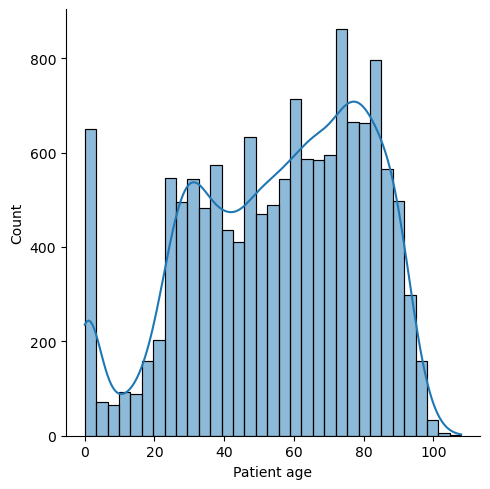

In [23]:
sns.displot(X["Patient age"], kde=True)
plt.show()

In [24]:
p = final_df_filtered["Collection date"].dt.to_period("M")
time_points = p.sort_values().unique()

In [25]:
def compute_ece(y_true, y_prob, n_bins=10):
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    ece = 0.0
    for i in range(n_bins):
        m = (y_prob >= bins[i]) & (y_prob < bins[i+1])
        if np.any(m):
            acc = np.mean(y_true[m])
            conf = np.mean(y_prob[m])
            ece += (np.sum(m) / len(y_true)) * np.abs(acc - conf)
    return float(ece)

def choose_bins(n_train: int, n_test: int, min_per_bin: int = 50,
                min_bins: int = 5, max_bins: int = 20) -> int:
    n = min(int(n_train), int(n_test))
    return max(min_bins, min(max_bins, n // min_per_bin))

In [26]:
def compute_psi_quantile(expected, actual, bins: int = None, eps: float = 1e-6):
    expected = np.asarray(expected, dtype=float)
    actual   = np.asarray(actual, dtype=float)
    if bins is None:
        bins = choose_bins(len(expected), len(actual))
    if np.nanstd(expected) == 0 and np.nanstd(actual) == 0:
        return 0.0
    q = np.linspace(0, 1, bins + 1)
    edges = np.unique(np.quantile(expected, q))
    if len(edges) < 3:
        return 0.0
    exp_counts, _ = np.histogram(expected, bins=edges)
    act_counts, _ = np.histogram(actual,   bins=edges)
    exp_prop = exp_counts / max(1, exp_counts.sum())
    act_prop = act_counts / max(1, act_counts.sum())
    exp_prop = np.where(exp_prop == 0, eps, exp_prop)
    act_prop = np.where(act_prop == 0, eps, act_prop)
    return float(np.sum((exp_prop - act_prop) * np.log(exp_prop / act_prop)))

In [27]:
def shap_values_2d(model, X_train):
    explainer = shap.TreeExplainer(model)
    sv = explainer.shap_values(X_train)
    # LightGBM binary sometimes returns [class0, class1]
    if isinstance(sv, list) and len(sv) == 2:
        sv = sv[1]
    return np.asarray(sv)


In [28]:
n_months = final_df_filtered["Collection date"].dt.to_period("M").nunique()
print("Number of unique months:", n_months)

Number of unique months: 17


In [29]:
group_data = final_df_filtered[['country_encoded', 'region_encoded']]


In [31]:
from sklearn.metrics import confusion_matrix, roc_auc_score, brier_score_loss
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import brier_score_loss
from sklearn.linear_model import LogisticRegression  # <-- needed for calibration
import gpboost as gpb
import pandas as pd
import numpy as np

def clean_features(df_or_arr):
   
    if isinstance(df_or_arr, pd.DataFrame):
        for col in df_or_arr.select_dtypes(include=["datetime64"]).columns:
            df_or_arr[col] = df_or_arr[col].astype("int64") // 10**9
        return df_or_arr.astype(np.float32).values
    elif isinstance(df_or_arr, np.ndarray):
        if df_or_arr.dtype == "object":
            return clean_features(pd.DataFrame(df_or_arr))
        return df_or_arr.astype(np.float32)
    else:
        raise TypeError(f"Unsupported type: {type(df_or_arr)}")

def make_nested_id(country_ids: np.ndarray, region_ids: np.ndarray) -> np.ndarray:
    c = country_ids.astype(np.int64)
    r = region_ids.astype(np.int64)
    return ((c << 20) ^ r).astype(np.int64)

def extract_prob(preds):
   
    if isinstance(preds, dict) and "response_mean" in preds:
        return preds["response_mean"]
    return preds

def fit_gpboost_binary(X_mat, y_vec, group_mat, params):
   
    gp_model = gpb.GPModel(
        group_data=group_mat,               # shape (n, 2): [country, country#region]
        likelihood="bernoulli_probit"
    )
    p_ = dict(params)
    p_["objective"] = "binary"
    train_set = gpb.Dataset(data=X_mat, label=y_vec.astype(np.float32))
    model = gpb.train(
        params=p_,
        train_set=train_set,
        gp_model=gp_model,
        num_boost_round=p_["n_estimators"]
    )
    return model


import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import brier_score_loss  # import at top of file

def recalibrate_predictions(y_train_true, p_train, p_test,
                            method="logistic", use_logits=False, C=0.1, return_diag=False):
   
    if method != "logistic":
        raise ValueError("Only method='logistic' is implemented.")

    eps = 1e-6
    p_train = np.asarray(p_train, dtype=float)
    p_test  = np.asarray(p_test,  dtype=float)

    if use_logits:
        z_train = p_train.reshape(-1, 1)
        z_test  = p_test.reshape(-1, 1)
    else:
        p_train = np.clip(p_train, eps, 1 - eps)
        p_test  = np.clip(p_test,  eps, 1 - eps)
        z_train = np.log(p_train / (1.0 - p_train)).reshape(-1, 1)
        z_test  = np.log(p_test  / (1.0 - p_test)).reshape(-1, 1)

    lr = LogisticRegression(solver="lbfgs", max_iter=1000, penalty="l2", C=C)
    lr.fit(z_train, y_train_true.astype(int))
    p_test_cal = lr.predict_proba(z_test)[:, 1]

    # calibration predictions on train set
    p_train_cal = lr.predict_proba(z_train)[:, 1]

    diag = {
        'brier_cal': brier_score_loss(y_train_true, p_train_cal),
        'psi_cal_vs_orig': compute_psi_quantile(p_train, p_train_cal)
    }

    if return_diag:
        return p_test_cal, lr, diag
    else:
        return p_test_cal, lr, diag



results = []

start_after = 3 
for i in range(start_after, len(time_points) - 1):
    train_end = time_points[i]
    test_end  = time_points[i + 1]

    train_idx = (p <= train_end)
    test_idx  = (p > train_end) & (p <= test_end)

    if test_idx.sum() < 20 or train_idx.sum() < 80:
        continue

    print(f"Split {i}: train_end={train_end}, test_end={test_end}, "
          f"n_train={train_idx.sum()}, n_test={test_idx.sum()}")

    X_train, y_train = X.loc[train_idx].copy(), y.loc[train_idx].copy()
    X_test,  y_test  = X.loc[test_idx].copy(),  y.loc[test_idx].copy()

    gtr = group_data.loc[train_idx, ['country_encoded','region_encoded']].values
    gte = group_data.loc[test_idx,  ['country_encoded','region_encoded']].values
    country_tr, region_tr = gtr[:, 0].astype(np.int32), gtr[:, 1].astype(np.int32)
    country_te, region_te = gte[:, 0].astype(np.int32), gte[:, 1].astype(np.int32)

    reg_in_ctry_tr = make_nested_id(country_tr, region_tr)
    reg_in_ctry_te = make_nested_id(country_te, region_te)

    group_train_nested = np.column_stack([country_tr, reg_in_ctry_tr])
    group_test_nested  = np.column_stack([country_te, reg_in_ctry_te])

    X_train.drop(columns=["Collection date"], errors="ignore", inplace=True)
    X_test.drop(columns=["Collection date"], errors="ignore", inplace=True)

    scaler = None
    if "Patient age" in X_train.columns:
        scaler = StandardScaler()
        X_train[["Patient age"]] = scaler.fit_transform(X_train[["Patient age"]])
        X_test[["Patient age"]]  = scaler.transform(X_test[["Patient age"]])

    X_train_np = clean_features(X_train)
    X_test_np  = clean_features(X_test)
    y_train_np = y_train.values.astype(np.float32)
    y_test_np  = y_test.values.astype(np.float32)

    rng = np.random.default_rng(42 + i)
    params = {
        'n_estimators': int(rng.integers(500, 2101)),
        'max_depth':   int(rng.integers(10, 41)),
        'learning_rate': float(rng.uniform(0.001, 0.099)),
        'num_leaves':  int(rng.integers(10, 51)),
        'seed': 42 
    }

    full_model = fit_gpboost_binary(X_train_np, y_train_np, group_train_nested, params)

    train_preds_full = full_model.predict(
        data=X_train_np,
        group_data_pred=group_train_nested,
        pred_latent=False
    )
    y_prob_train_full = extract_prob(train_preds_full)

    preds_full = full_model.predict(
        data=X_test_np,
        group_data_pred=group_test_nested,
        pred_latent=False
    )
    y_prob_full = extract_prob(preds_full)
    y_pred_full = (y_prob_full >= 0.5).astype(int)
    auc_full   = roc_auc_score(y_test_np, y_prob_full)
    brier_full = brier_score_loss(y_test_np, y_prob_full)
    ece_full   = compute_ece(y_test_np, y_prob_full, n_bins=10)
    print("\n Test Set Performance (full model):")
    print(confusion_matrix(y_test_np.astype(int), y_pred_full.astype(int)))
    print("Test ROC AUC:", auc_full)
    print("Test Brier score:", brier_full)

    try:
        sv = shap_values_2d(full_model, X_train)  
        mean_abs_shap = np.mean(np.abs(sv), axis=0)
        top_idx = np.argsort(mean_abs_shap)[-10:]
        top_feats = [X_train.columns[j] for j in top_idx]
    except Exception as e:
        print(f"[WARN] SHAP failed ({e}); fallback to last 10 cols.")
        top_feats = list(X_train.columns[-10:])

    
    psi_feat = {f: compute_psi_quantile(X_train[f].values, X_test[f].values) for f in top_feats}
    avg_psi_top10 = float(np.mean(list(psi_feat.values())))
    max_psi_top10 = float(np.max(list(psi_feat.values())))

    psi_score_raw = compute_psi_quantile(y_prob_train_full, y_prob_full)
   
    # Decision rules
    auroc_thresh     = 0.70
    psi_feat_thresh  = 0.25   # significant feature-level drift
    pred_psi_thresh  = 1.5    # score-level drift

    if (auc_full < auroc_thresh) or (max_psi_top10 >= psi_feat_thresh) or (avg_psi_top10 >= psi_feat_thresh):
        status = "Retraining needed"
    elif (0.10 <= max_psi_top10 < psi_feat_thresh):
        status = "Recalibration needed.Max_PSI exceeded"
    elif (0.10 <= avg_psi_top10 < psi_feat_thresh):
        status = "Recalibration needed.Max_PSI exceeded"    
    else:
        status = "Stable"
        
    initial_status = status  
    # RETRAIN (recent window) if needed
    model_used = "full"
    retrain_note = ""
    y_prob_used = y_prob_full
    auc_used, brier_used, ece_used = auc_full, brier_full, ece_full

    # Preparation of calibration training sets
    y_cal_train = y_train_np
    y_cal_train_probs = y_prob_train_full

    if status == "Retraining needed":
        lookback_months = 3
        recent_mask = (p > (train_end - lookback_months)) & (p <= train_end)
        recent_mask &= train_idx
        n_recent = int(recent_mask.sum())

        if n_recent >= 200:
            X_trn_recent = X.loc[recent_mask].drop(columns=["Collection date"], errors="ignore").copy()
            if (scaler is not None) and ("Patient age" in X_trn_recent.columns):
                X_trn_recent[["Patient age"]] = scaler.transform(X_trn_recent[["Patient age"]])

            y_trn_recent = y.loc[recent_mask].values.astype(np.float32)
            g_recent = group_data.loc[recent_mask, ['country_encoded','region_encoded']].values
            country_r, region_r = g_recent[:, 0].astype(np.int32), g_recent[:, 1].astype(np.int32)
            reg_in_ctry_r = make_nested_id(country_r, region_r)
            group_recent_nested = np.column_stack([country_r, reg_in_ctry_r])

            X_trn_recent_np = clean_features(X_trn_recent)

            retrained_model = fit_gpboost_binary(X_trn_recent_np, y_trn_recent, group_recent_nested, params)

            # train-scores for calibration/PSI if we choose retrained model
            train_preds_recent = retrained_model.predict(
                data=X_trn_recent_np,
                group_data_pred=group_recent_nested,
                pred_latent=False
            )
            y_prob_train_recent = extract_prob(train_preds_recent)

            # test predictions 
            preds2 = retrained_model.predict(
                data=X_test_np,
                group_data_pred=group_test_nested,
                pred_latent=False
            )
            y_prob2 = extract_prob(preds2)

            auc2   = roc_auc_score(y_test_np, y_prob2)
            brier2 = brier_score_loss(y_test_np, y_prob2)
            ece2   = compute_ece(y_test_np, y_prob2, n_bins=10)

            choose_retrained = (auc2 > auc_used) or (np.isclose(auc2, auc_used) and brier2 <= brier_used)
            if choose_retrained:
                model_used   = "retrained_recent"
                retrain_note = f"Retrained on last {lookback_months} months (n={n_recent}).Model stable after retraining."
                y_prob_used  = y_prob2
                auc_used, brier_used, ece_used = auc2, brier2, ece2
                y_cal_train = y_trn_recent
                y_cal_train_probs = y_prob_train_recent
            else:
                retrain_note = f"Retraining tried (n={n_recent}) but original full model retained."
        else:
            retrain_note = f"Retrain skipped (recent window too small: n={n_recent})."

    # Recalibration (post-hoc) 
    y_prob_test_cal, cal_model,diag = recalibrate_predictions(
        y_cal_train, y_cal_train_probs, y_prob_used, method="logistic",C=0.1
    )
    # Compare before vs after calibration 
    auc_before  = roc_auc_score(y_test_np, y_prob_used)
    brier_before = brier_score_loss(y_test_np, y_prob_used)
    psi_before   = compute_psi_quantile(y_cal_train_probs, y_prob_used)

    auc_after  = roc_auc_score(y_test_np, y_prob_test_cal)
    brier_after = brier_score_loss(y_test_np, y_prob_test_cal)
    psi_after   = compute_psi_quantile(y_cal_train_probs, y_prob_test_cal)

    print(f"AUROC before: {auc_before:.3f} after: {auc_after:.3f}")
    print(f"Brier before: {brier_before:.3f} after: {brier_after:.3f}")
    print(f"PSI (raw scores) before: {psi_before:.3f} after: {psi_after:.3f}")
    print("Calib Brier (train):", diag['brier_cal'], " Calib-PSI:", diag['psi_cal_vs_orig'])
    if initial_status.startswith("Recalibration"):
        if (auc_after >= auc_before) or (brier_after <= brier_before) or (psi_after <= psi_before):
            status = "Stable after recalibration"
        else:
            status = "Not stable after recalibration"
    else:
        status = initial_status  
    
    print(f"\n[{str(train_end)} ➜ {str(test_end)}] "
          f"AUROC={auc_used:.3f} | ECE={ece_used:.3f} | Brier={brier_used:.3f} | "
          f"AvgPSI_top10={avg_psi_top10:.3f} | MaxPSI_top10={max_psi_top10:.3f} | "
          f"ScorePSI_raw={psi_score_raw:.3f} | Status={status} | "
          f"ModelUsed={model_used} | {retrain_note}")

    top3 = sorted(psi_feat.items(), key=lambda kv: kv[1], reverse=True)[:3]
    results.append({
        "train_end": str(train_end),
        "test_end":  str(test_end),
        "n_train": int(train_idx.sum()),
        "n_test":  int(test_idx.sum()),
        "AUROC": float(auc_used),
        "ECE": float(ece_used),
        "Brier": float(brier_used),
        "Avg_PSI_top10": avg_psi_top10,
        "Max_PSI_top10": max_psi_top10,
        "Score_PSI_raw": float(psi_score_raw),
        "InitialStatus": initial_status,
        "FinalStatus": status,
        "ModelUsed": model_used,
        "RetrainNote": retrain_note,
        "Top10_features": ",".join(top_feats),
        "Top3_PSI_features": ",".join([f"{k}:{psi_feat[k]:.3f}" for k,_ in top3]),
        "AUROC_after_cal": float(auc_after),
        "Brier_after_cal": float(brier_after),
        "Score_PSI_after_cal": float(psi_after),
    })

results_df = pd.DataFrame(results)
print(results_df.head())


Split 3: train_end=2024-04, test_end=2024-05, n_train=4973, n_test=1110
[GPBoost] [Info] Total Bins 18904
[GPBoost] [Info] Number of data points in the train set: 4973, number of used features: 9395
[GPBoost] [Info] [GPBoost with bernoulli_probit likelihood]: initscore=2.077703
[GPBoost] [Info] Start training from score 2.077703

 Test Set Performance (full model):
[[235  59]
 [313 503]]
Test ROC AUC: 0.7525614412431638
Test Brier score: 0.24501351557405593
AUROC before: 0.753 after: 0.753
Brier before: 0.245 after: 0.281
PSI (raw scores) before: 0.356 after: 0.867
Calib Brier (train): 0.02616542016313202  Calib-PSI: 0.5552156828652028

[2024-04 ➜ 2024-05] AUROC=0.753 | ECE=0.211 | Brier=0.245 | AvgPSI_top10=0.011 | MaxPSI_top10=0.108 | ScorePSI_raw=0.356 | Status=Stable after recalibration | ModelUsed=full | 
Split 4: train_end=2024-05, test_end=2024-06, n_train=6083, n_test=1595
[GPBoost] [Info] Total Bins 19084
[GPBoost] [Info] Number of data points in the train set: 6083, number of

In [32]:
results_df

train_end test_end  n_train  n_test     AUROC       ECE     Brier  \
0    2024-04  2024-05     4973    1110  0.752561  0.210877  0.245014   
1    2024-05  2024-06     6083    1595  0.859889  0.103290  0.155549   
2    2024-06  2024-07     7678    2130  0.766682  0.096488  0.205808   
3    2024-07  2024-08     9808    1239  0.815482  0.077284  0.172478   
4    2024-08  2024-09    11047     898  0.872062  0.104860  0.143519   
5    2024-09  2024-10    11945     658  0.952394  0.117028  0.086547   
6    2024-10  2024-11    12603     496  0.797672  0.105895  0.169814   
7    2024-11  2024-12    13099     285  0.943908  0.074671  0.089575   
8    2024-12  2025-01    13384     192  0.881657  0.054671  0.090947   
9    2025-01  2025-02    13576     116  0.876417  0.063175  0.096495   
10   2025-02  2025-03    13692     143  0.776109  0.134167  0.189550   
11   2025-03  2025-04    13835     130  0.799926  0.157544  0.190403   

    Avg_PSI_top10  Max_PSI_top10  Score_PSI_raw  \
0        0.010842       0.108425       0.355888   
1        0.006609       0.066091       0.760007   
2        0.004375       0.043748       0.431901   
3        0.004423       0.044232       0.208625   
4        0.004742       0.047420       0.379759   
5        0.017094       0.170937       0.238529   
6        0.009642       0.096416       0.657813   
7        0.000433       0.004332       0.063795   
8        0.006297       0.062969       0.721559   
9        0.022718       0.227177       0.643543   
10       0.004568       0.045681       0.499743   
11       0.016420       0.164202       3.548075   

                            InitialStatus                 FinalStatus  \
0   Recalibration needed.Max_PSI exceeded  Stable after recalibration   
1                                  Stable                      Stable   
2                                  Stable                      Stable   
3                                  Stable                      Stable   
4                                  Stable                      Stable   
5   Recalibration needed.Max_PSI exceeded  Stable after recalibration   
6                                  Stable                      Stable   
7                                  Stable                      Stable   
8                                  Stable                      Stable   
9   Recalibration needed.Max_PSI exceeded  Stable after recalibration   
10                                 Stable                      Stable   
11  Recalibration needed.Max_PSI exceeded  Stable after recalibration   

   ModelUsed RetrainNote                                     Top10_features  \
0       full              C21711Y,Gender,C64T,T3565C,T11285C,C44T,A29827...   
1       full              G22770A,C66T,C44T,G22599C,T29842C,T29867A,T112...   
2       full              Gender,C20930T,T29867A,C44T,T11285C,T29842C,A2...   
3       full              C29762T,T29867A,G22770A,T29842C,T11285C,A29824...   
4       full              G22770A,C44T,C29762T,T29858C,T11285C,A29827T,G...   
5       full              T29867A,A29824T,A29827T,C44T,T29842C,G11291A,T...   
6       full              C29762T,T29867A,T29826A,T29842C,A29827T,T11285...   
7       full              T29820A,C44T,A29827T,T29826A,T29842C,T11285C,G...   
8       full              G22770A,T29867A,T29826A,T29842C,T11285C,A29827...   
9       full              G22770A,T29820A,T29826A,T29842C,T11285C,A29827...   
10      full              T29820A,G22770A,T29842C,T29826A,C44T,A29827T,G...   
11      full              G15007A,T29826A,G13427A,T29867A,T29842C,T11285...   

                                Top3_PSI_features  AUROC_after_cal  \
0    Patient age:0.108,C21711Y:0.000,Gender:0.000         0.752561   
1      Patient age:0.066,G22770A:0.000,C66T:0.000         0.859889   
2    Patient age:0.044,Gender:0.000,C20930T:0.000         0.766682   
3   Patient age:0.044,C29762T:0.000,T29867A:0.000         0.815482   
4      Patient age:0.047,G22770A:0.000,C44T:0.000         0.872062   
5   

In [33]:
# Expand Top10_features into 10 new columns
top10_split = results_df["Top10_features"].str.split(",", expand=True)
top10_split.columns = [f"TopFeat_{i+1}" for i in range(10)]

# Join back to results_df
results_expanded = pd.concat([results_df, top10_split], axis=1)

print(results_expanded.head())


  train_end test_end  n_train  n_test     AUROC       ECE     Brier  \
0   2024-04  2024-05     4973    1110  0.752561  0.210877  0.245014   
1   2024-05  2024-06     6083    1595  0.859889  0.103290  0.155549   
2   2024-06  2024-07     7678    2130  0.766682  0.096488  0.205808   
3   2024-07  2024-08     9808    1239  0.815482  0.077284  0.172478   
4   2024-08  2024-09    11047     898  0.872062  0.104860  0.143519   

   Avg_PSI_top10  Max_PSI_top10  Score_PSI_raw  ... TopFeat_1 TopFeat_2  \
0       0.010842       0.108425       0.355888  ...   C21711Y    Gender   
1       0.006609       0.066091       0.760007  ...   G22770A      C66T   
2       0.004375       0.043748       0.431901  ...    Gender   C20930T   
3       0.004423       0.044232       0.208625  ...   C29762T   T29867A   
4       0.004742       0.047420       0.379759  ...   G22770A      C44T   

  TopFeat_3 TopFeat_4 TopFeat_5 TopFeat_6  TopFeat_7  TopFeat_8    TopFeat_9  \
0      C64T    T3565C   T11285C      C44T 

In [34]:
results_expanded

train_end test_end  n_train  n_test     AUROC       ECE     Brier  \
0    2024-04  2024-05     4973    1110  0.752561  0.210877  0.245014   
1    2024-05  2024-06     6083    1595  0.859889  0.103290  0.155549   
2    2024-06  2024-07     7678    2130  0.766682  0.096488  0.205808   
3    2024-07  2024-08     9808    1239  0.815482  0.077284  0.172478   
4    2024-08  2024-09    11047     898  0.872062  0.104860  0.143519   
5    2024-09  2024-10    11945     658  0.952394  0.117028  0.086547   
6    2024-10  2024-11    12603     496  0.797672  0.105895  0.169814   
7    2024-11  2024-12    13099     285  0.943908  0.074671  0.089575   
8    2024-12  2025-01    13384     192  0.881657  0.054671  0.090947   
9    2025-01  2025-02    13576     116  0.876417  0.063175  0.096495   
10   2025-02  2025-03    13692     143  0.776109  0.134167  0.189550   
11   2025-03  2025-04    13835     130  0.799926  0.157544  0.190403   

    Avg_PSI_top10  Max_PSI_top10  Score_PSI_raw  ... TopFeat_1 TopFeat_2  \
0        0.010842       0.108425       0.355888  ...   C21711Y    Gender   
1        0.006609       0.066091       0.760007  ...   G22770A      C66T   
2        0.004375       0.043748       0.431901  ...    Gender   C20930T   
3        0.004423       0.044232       0.208625  ...   C29762T   T29867A   
4        0.004742       0.047420       0.379759  ...   G22770A      C44T   
5        0.017094       0.170937       0.238529  ...   T29867A   A29824T   
6        0.009642       0.096416       0.657813  ...   C29762T   T29867A   
7        0.000433       0.004332       0.063795  ...   T29820A      C44T   
8        0.006297       0.062969       0.721559  ...   G22770A   T29867A   
9        0.022718       0.227177       0.643543  ...   G22770A   T29820A   
10       0.004568       0.045681       0.499743  ...   T29820A   G22770A   
11       0.016420       0.164202       3.548075  ...   G15007A   T29826A   

   TopFeat_3 TopFeat_4 TopFeat_5 TopFeat_6  TopFeat_7  TopFeat_8    TopFeat_9  \
0       C64T    T3565C   T11285C      C44T    A29827T    T29858C  Patient age   
1       C44T   G22599C   T29842C   T29867A    T11285C    A29827T  Patient age   
2    T29867A      C44T   T11285C   T29842C    A29827T    T29858C  Patient age   
3    G22770A   T29842C   T11285C   A29824T    G11291A    A29860T  Patient age   
4    C29762T   T29858C   T11285C   A29827T    G11291A    A29860T  Patient age   
5    A29827T      C44T   T29842C   G11291A    T11285C    A29860T  Patient age   
6    T29826A   T29842C   A29827T   T11285C    G11291A    A29860T  Patient age   
7    A29827T   T29826A   T29842C   T11285C    G11291A    A29860T  Patient age   
8    T29826A   T29842C   T11285C   A29827T    G11291A    A29860T  Patient age   
9    T29826A   T29842C   T11285C   A29827T    G11291A    A29860T  Patient age   
10   T29842C   T29826A      C44T   A29827T    G11291A    A29860T  Patient age   
11   G13427A   T29867A   T29842C   T11285C    G11291A    A29827T  Patient age   

   TopFeat_10  
0     G29864A  
1     G29864A  
2     G29864A  
3     G29864A  
4     G29864A  
5     G29864A  
6     G29864A  
7     G29864A  
8     G29864A  
9     G29864A  
10    G29864A  
11    G29864A  

[12 rows x 29 columns]

In [35]:
results_df.to_csv("resultsgpboosttemporalfinal.txt", sep="\t", index=False)

In [36]:
results_expanded.to_csv("resultsgpboosttemporalwithfullpsifeaturesfinal.txt", sep="\t", index=False)